In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
%matplotlib inline

In [145]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [146]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [154]:
#train=train.drop(693)

In [152]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1458.000000,1458.000000,1199.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1450.000000,1458.000000,...,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,730.550754,56.913580,70.081735,10509.596022,6.099451,5.575446,1971.290123,1984.873800,103.626207,443.586420,...,94.154321,46.705761,21.907407,3.414266,15.081619,2.762689,43.548697,6.319616,2007.818244,180865.203018
std,421.897048,42.323647,24.289744,9978.779556,1.383445,1.113405,30.191340,20.654407,181.102363,456.058523,...,125.260903,66.288200,61.112847,29.337173,55.792877,40.204743,496.460799,2.700703,1.327300,79371.755723
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.250000,20.000000,NaN,7558.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,731.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.750000,70.000000,NaN,11600.000000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


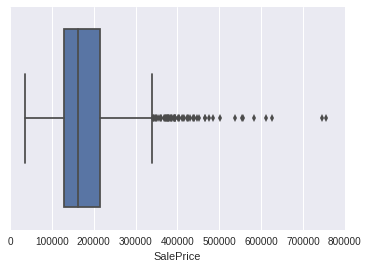

In [153]:
sns.boxplot(x = 'SalePrice', data = train)
plt.show()

In [105]:
#from pandas import rolling_median

#threshold = 300000
#train['pandas'] = rolling_median(train['SalePrice'], window=3, center=True).fillna(method='bfill').fillna(method='ffill')

#difference = np.abs(train['SalePrice'] - train['pandas'])
#outlier_idx = difference > threshold
#print difference
#fig, ax = plt.subplots()
#train['SalePrice'].plot()
#train['SalePrice'][outlier_idx].plot(**kw)
#_ = ax.set_ylim(-50, 50)

In [106]:
#for i in range(1,1400):
#    print difference[i],i

In [107]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bf27b72d0>]], dtype=object)

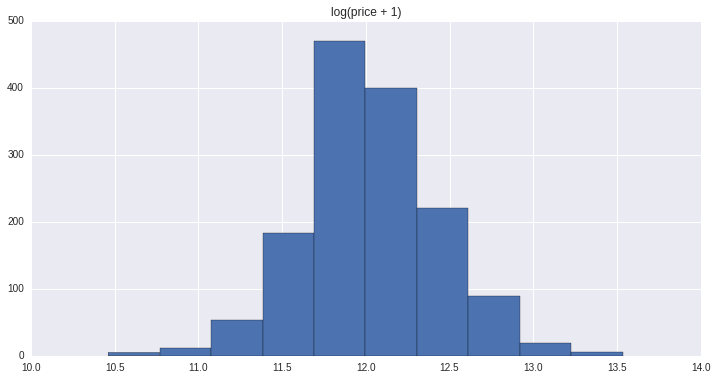

In [108]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({ "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [109]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))#compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.0]
skewed_feats = skewed_feats.index
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [110]:
all_data = pd.get_dummies(all_data)

In [111]:
all_data = all_data.fillna(all_data.mean())

In [112]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [113]:
from sklearn.linear_model import LassoCV,Ridge
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [114]:
model_ridge = Ridge()

In [115]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

In [116]:
rmse_cv(model_ridge).mean()

0.13183374672569587

In [117]:
#from sklearn.ensemble import GradientBoostingRegressor
#clf2 = GradientBoostingRegressor(random_state=1,n_estimators=340).fit(X_train, y)

In [118]:
#from sklearn.ensemble import RandomForestRegressor
#clf1 = RandomForestRegressor().fit(X_train, y)

In [119]:
import xgboost as xgb
#clf = xgb.XGBRegressor().fit(X_train, y)
clf=xgb.XGBRegressor(
                 colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=7200,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1).fit(X_train, y)

In [120]:
model_lasso = LassoCV(alphas = [10,1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [121]:
rmse_cv(model_lasso).mean()

0.12301283484008067

In [122]:
rmse_cv(clf).mean()

0.12169965314428384

In [123]:
from sklearn.linear_model import RidgeCV
sgd = RidgeCV().fit(X_train, y)
rmse_cv(sgd).mean()

0.13028204958710704

In [124]:
a = np.expm1(model_lasso.predict(X_test))
b = np.expm1(clf.predict(X_test))
#c=(a+b)/2

In [125]:
from sklearn.linear_model import ElasticNet
EN = ElasticNet(alpha=0.00093,l1_ratio=0.8).fit(X_train, y)
rmse_cv(EN).mean()
c= np.expm1(EN.predict(X_test))

In [126]:
d=(a+b)/2

In [127]:
#X_test

In [128]:
predictions = d
output = pd.DataFrame({ "id":test.Id, 'SalePrice': predictions })
output.to_csv('price.csv', index = False)


In [129]:
predictions

array([ 121344.12138094,  157677.07152996,  185146.4494135 , ...,
        165522.81461539,  119886.16889444,  221533.43494134])